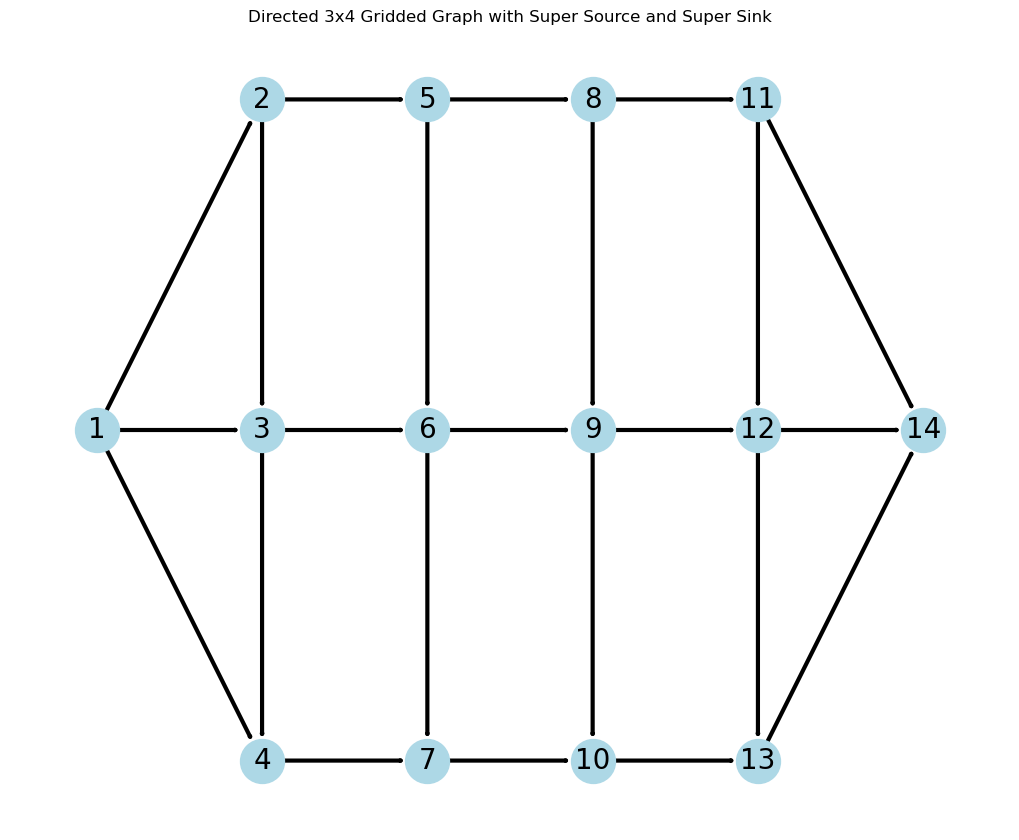

In [1]:
#WINNER - Modify for providing framework for expanded state space training - Directed Networks
import networkx as nx
import random
import matplotlib.pyplot as plt
import pandas as pd

def create_grid_graph(rows, cols):
    # Initialize directed graph
    G = nx.DiGraph()

    # Create nodes and assign positions
    node_positions = {}
    node_types = {}
    node_id = 1

    # Add super source
    G.add_node(node_id)
    node_positions[node_id] = (-1, (rows - 1) / 2)  # Position for plotting
    node_types[node_id] = 'source'
    super_source = node_id
    node_id += 1

    # Add grid nodes
    grid_nodes = []
    for col in range(cols):
        column_nodes = []
        for row in range(rows):
            G.add_node(node_id)
            node_positions[node_id] = (col, rows - 1 - row)  # Position for plotting
            node_types[node_id] = 'intermediate'
            column_nodes.append(node_id)
            node_id += 1
        grid_nodes.append(column_nodes)

    # Add super sink
    G.add_node(node_id)
    node_positions[node_id] = (cols, (rows - 1) / 2)  # Position for plotting
    node_types[node_id] = 'sink'
    super_sink = node_id

    
    edge_data = []    
    # Add edges from super source to the first column
    for node in grid_nodes[0]:
        G.add_edge(super_source, node)
        u = super_source
        v = node
        interdictable = 0
        edge_data.append((u, v, interdictable))#, bidirectional))

    # Add edges between columns
    for col in range(cols - 1):
        for i in range(rows):
            G.add_edge(grid_nodes[col][i], grid_nodes[col + 1][i])
            u = grid_nodes[col][i]
            v = grid_nodes[col + 1][i]
            interdictable = 1
            edge_data.append((u, v, interdictable))#, bidirectional))
            
    # Add edges within each column (random direction)
    for column_nodes in grid_nodes:
        for i in range(len(column_nodes) - 1):
            #if random.choice([True, False]):
            #    G.add_edge(column_nodes[i], column_nodes[i + 1])
            #else:
            #    G.add_edge(column_nodes[i + 1], column_nodes[i])
            G.add_edge(column_nodes[i], column_nodes[i + 1])
            u = column_nodes[i]
            v = column_nodes[i + 1]
            interdictable = 1
            edge_data.append((u, v, interdictable))#, bidirectional))

            
    # Add edges from the last column to the super sink
    for node in grid_nodes[-1]:
        G.add_edge(node, super_sink)
        u = node
        v = super_sink
        interdictable = 0
        #bidirectional = 0
        edge_data.append((u, v, interdictable))#, bidirectional))

    edges_df = pd.DataFrame(edge_data, columns=['Origin', 'Destination', 'Interdictable'])

    # Prepare node data for export
    node_data = []
    for node, (x, y) in node_positions.items():
        node_type = node_types[node]
        node_data.append((node, x, y, node_type))

    nodes_df = pd.DataFrame(node_data, columns=['node', 'x_pos', 'y_pos', 'type'])

    return G, node_positions, nodes_df, edges_df

def main():
    rows = 3 #int(input("Enter the number of rows: "))
    cols = 4 #int(input("Enter the number of columns: "))

    G, node_positions, nodes_df, edges_df = create_grid_graph(rows, cols)

    # Export to CSV files
    nodes_df.to_csv('nodes.csv', index=False)
    edges_df.to_csv('edges.csv', index=False)

    # Plot the graph with attributes
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos=node_positions, with_labels=True, node_size=1000, node_color='lightblue', font_size= 20, arrowsize=1, width=3, edge_color='black')
    plt.title(f'Directed {rows}x{cols} Gridded Graph with Super Source and Super Sink')
    plt.show()

if __name__ == "__main__":
    main()

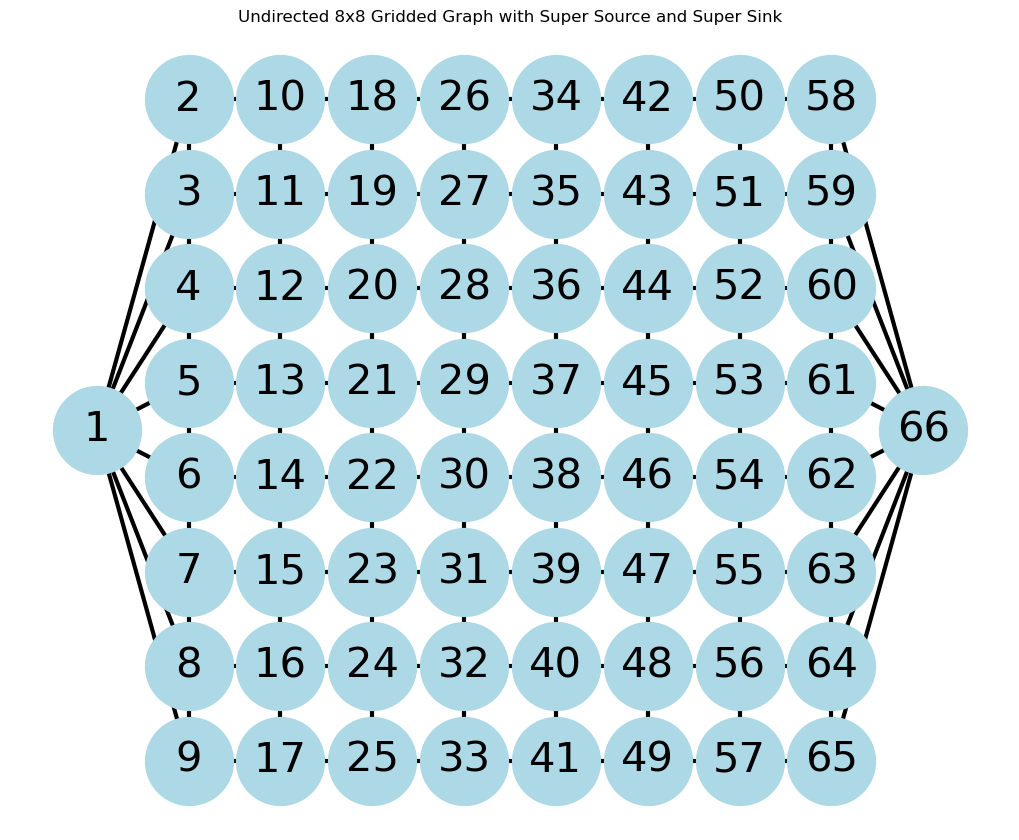

In [10]:
#WINNER - Modify for providing framework for expanded state space training - undirected Networks
import networkx as nx
import random
import matplotlib.pyplot as plt
import pandas as pd

def create_grid_graph(rows, cols):
    # Initialize directed graph
    G = nx.DiGraph()

    # Create nodes and assign positions
    node_positions = {}
    node_types = {}
    node_id = 1

    # Add super source
    G.add_node(node_id)
    node_positions[node_id] = (-1, (rows - 1) / 2)  # Position for plotting
    node_types[node_id] = 'source'
    super_source = node_id
    node_id += 1

    # Add grid nodes
    grid_nodes = []
    for col in range(cols):
        column_nodes = []
        for row in range(rows):
            G.add_node(node_id)
            node_positions[node_id] = (col, rows - 1 - row)  # Position for plotting
            node_types[node_id] = 'intermediate'
            column_nodes.append(node_id)
            node_id += 1
        grid_nodes.append(column_nodes)

    # Add super sink
    G.add_node(node_id)
    node_positions[node_id] = (cols, (rows - 1) / 2)  # Position for plotting
    node_types[node_id] = 'sink'
    super_sink = node_id

    
    edge_data = []    
    # Add edges from super source to the first column
    for node in grid_nodes[0]:
        G.add_edge(super_source, node)
        u = super_source
        v = node
        interdictable = 0
        edge_data.append((u, v, interdictable))

    # Add edges between columns
    for col in range(cols - 1):
        for i in range(rows):
            G.add_edge(grid_nodes[col][i], grid_nodes[col + 1][i])
            u = grid_nodes[col][i]
            v = grid_nodes[col + 1][i]
            interdictable = 1
            edge_data.append((u, v, interdictable))
            
    # Add edges within each column (random direction)
    for column_nodes in grid_nodes:
        for i in range(len(column_nodes) - 1):
            #if random.choice([True, False]):
            #    G.add_edge(column_nodes[i], column_nodes[i + 1])
            #else:
            #    G.add_edge(column_nodes[i + 1], column_nodes[i])
            G.add_edge(column_nodes[i], column_nodes[i + 1])
            u = column_nodes[i]
            v = column_nodes[i + 1]
            interdictable = 1
            edge_data.append((u, v, interdictable))
            
    # Add edges from the last column to the super sink
    for node in grid_nodes[-1]:
        G.add_edge(node, super_sink)
        u = node
        v = super_sink
        interdictable = 0
        edge_data.append((u, v, interdictable))

    edges_df = pd.DataFrame(edge_data, columns=['Origin', 'Destination', 'Interdictable'])

    # Prepare node data for export
    node_data = []
    for node, (x, y) in node_positions.items():
        node_type = node_types[node]
        node_data.append((node, x, y, node_type))

    nodes_df = pd.DataFrame(node_data, columns=['node', 'x_pos', 'y_pos', 'type'])

    return G, node_positions, nodes_df, edges_df

def main():
    rows = 8 #int(input("Enter the number of rows: "))
    cols = 8 #int(input("Enter the number of columns: "))

    G, node_positions, nodes_df, edges_df = create_grid_graph(rows, cols)

    # Export to CSV files
    nodes_df.to_csv('nodes_U.csv', index=False)
    edges_df.to_csv('edges_U.csv', index=False)

    # Plot the graph with attributes
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos=node_positions, with_labels=True, node_size=4000, node_color='lightblue', font_size= 30, arrows=False,#arrowsize=20, 
            width=3, edge_color='black')
    plt.title(f'Undirected {rows}x{cols} Gridded Graph with Super Source and Super Sink')
    plt.show()

if __name__ == "__main__":
    main()

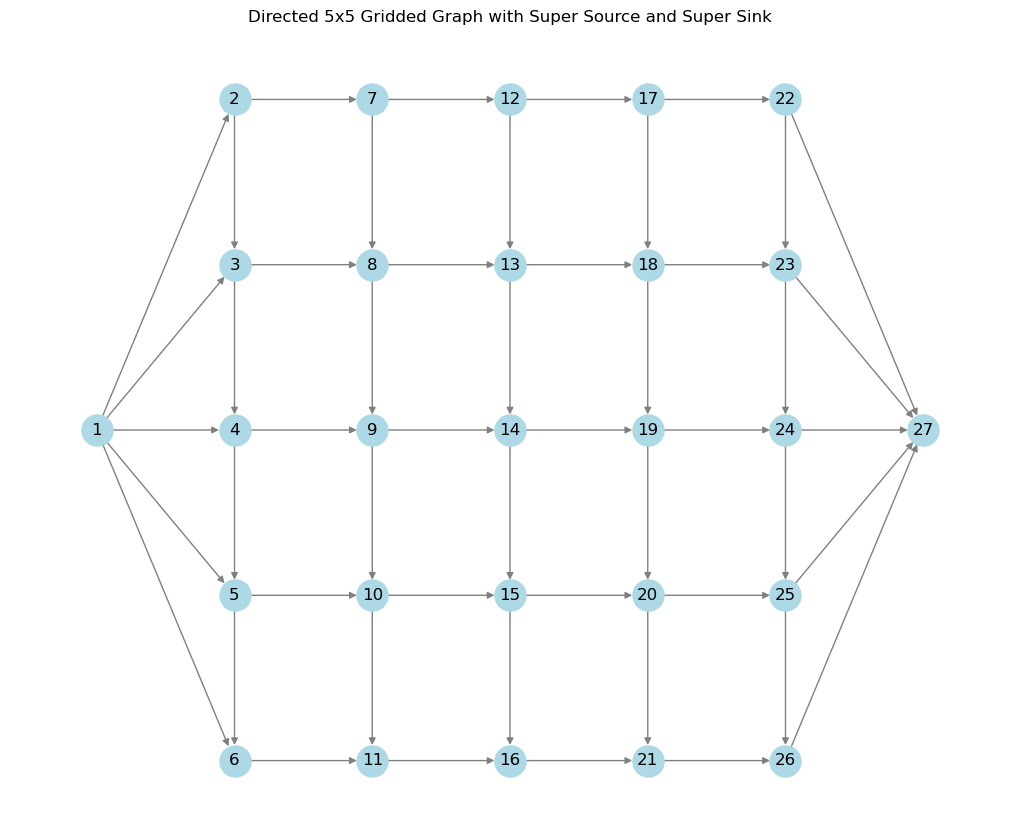

In [6]:
#WINNER - Use for generating graphs to then train on a single instance on.

import networkx as nx
import random
import matplotlib.pyplot as plt
import pandas as pd

def create_grid_graph(rows, cols):
    # Initialize directed graph
    G = nx.DiGraph()

    # Create nodes and assign positions
    node_positions = {}
    node_types = {}
    node_id = 1

    # Add super source
    G.add_node(node_id)
    node_positions[node_id] = (-1, (rows - 1) / 2)  # Position for plotting
    node_types[node_id] = 'source'
    super_source = node_id
    node_id += 1

    # Add grid nodes
    grid_nodes = []
    for col in range(cols):
        column_nodes = []
        for row in range(rows):
            G.add_node(node_id)
            node_positions[node_id] = (col, rows - 1 - row)  # Position for plotting
            node_types[node_id] = 'intermediate'
            column_nodes.append(node_id)
            node_id += 1
        grid_nodes.append(column_nodes)

    # Add super sink
    G.add_node(node_id)
    node_positions[node_id] = (cols, (rows - 1) / 2)  # Position for plotting
    node_types[node_id] = 'sink'
    super_sink = node_id

    # Add edges from super source to the first column
    for node in grid_nodes[0]:
        G.add_edge(super_source, node)

    # Add edges between columns
    for col in range(cols - 1):
        for i in range(rows):
            G.add_edge(grid_nodes[col][i], grid_nodes[col + 1][i])

    # Add edges within each column (random direction)
    for column_nodes in grid_nodes:
        for i in range(len(column_nodes) - 1):
            #if random.choice([True, False]):
            #    G.add_edge(column_nodes[i], column_nodes[i + 1])
            #else:
            #    G.add_edge(column_nodes[i + 1], column_nodes[i])
            G.add_edge(column_nodes[i], column_nodes[i + 1])
            
    # Add edges from the last column to the super sink
    for node in grid_nodes[-1]:
        G.add_edge(node, super_sink)

    # Assign random attributes to edges
    edge_data = []
    for u, v in G.edges():
        capacity = random.randint(5, 100)
        interdiction_cost = random.randint(1, 5) if u != super_source and v != super_sink else 0
        interdiction_probability = 1 if u != super_source and v != super_sink else 0
        edge_data.append((u, v, capacity, interdiction_probability, interdiction_cost))

    edges_df = pd.DataFrame(edge_data, columns=['Origin', 'Destination', 'Capacity', 'Interdiction_Probability', 'Interdiction_Cost'])

    # Prepare node data for export
    node_data = []
    for node, (x, y) in node_positions.items():
        node_type = node_types[node]
        node_data.append((node, x, y, node_type))

    nodes_df = pd.DataFrame(node_data, columns=['node', 'x_pos', 'y_pos', 'type'])

    return G, node_positions, nodes_df, edges_df

def main():
    rows = 5 #int(input("Enter the number of rows: "))
    cols = 5 #int(input("Enter the number of columns: "))

    G, node_positions, nodes_df, edges_df = create_grid_graph(rows, cols)

    # Export to CSV files
    nodes_df.to_csv('nodes.csv', index=False)
    edges_df.to_csv('edges.csv', index=False)

    # Plot the graph with attributes
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos=node_positions, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')
    plt.title(f'Directed {rows}x{cols} Gridded Graph with Super Source and Super Sink')
    plt.show()

if __name__ == "__main__":
    main()


Nodes and edges exported successfully!


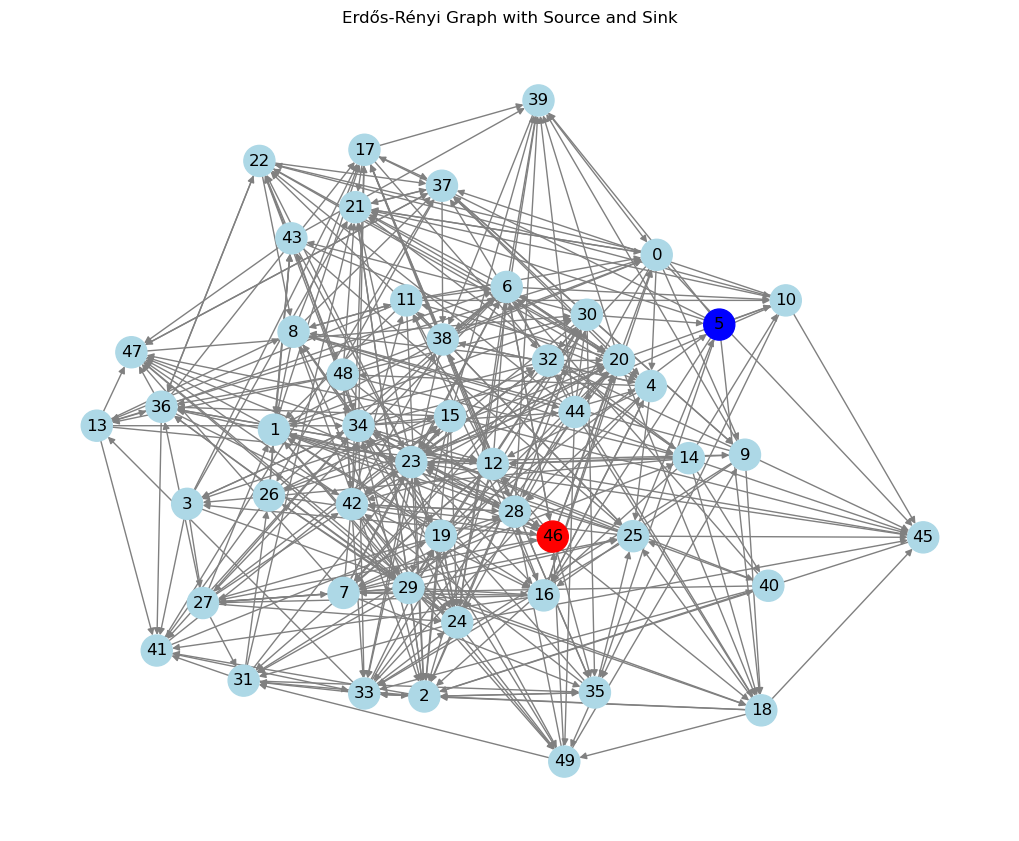

In [6]:
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate a random Erdős-Rényi graph
G = nx.gnm_random_graph(50, 374, directed=True)

# Step 2: Randomly choose a source and sink
nodes = list(G.nodes())
source = random.choice(nodes)
sink = random.choice(nodes)

# Ensure source and sink are different
while sink == source:
    sink = random.choice(nodes)

# Step 3: Ensure there is a directed path between source and sink
if not nx.has_path(G, source, sink):
    # Create a random path connecting source to sink
    path_nodes = random.sample(nodes, len(nodes))
    for i in range(len(path_nodes) - 1):
        G.add_edge(path_nodes[i], path_nodes[i + 1])
    G.add_edge(source, path_nodes[0])
    G.add_edge(path_nodes[-1], sink)

# Step 4: Prepare node data for export
node_data = []
for node in G.nodes():
    node_type = 'intermediate'
    if node == source:
        node_type = 'source'
    elif node == sink:
        node_type = 'sink'
    node_data.append((node, node_type))

nodes_df = pd.DataFrame(node_data, columns=['Node', 'Type'])

# Step 5: Prepare edge data for export
edge_data = []
for u, v in G.edges():
    edge_data.append((u, v))

edges_df = pd.DataFrame(edge_data, columns=['Origin', 'Destination'])

# Step 6: Export to CSV files
nodes_df.to_csv('erdos_renyi_nodes.csv', index=False)
edges_df.to_csv('erdos_renyi_edges.csv', index=False)

print("Nodes and edges exported successfully!")

# Step 7: Visualize the graph with source and sink highlighted
pos = nx.spring_layout(G)
node_colors = ['red' if node == source else 'blue' if node == sink else 'lightblue' for node in G.nodes()]

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, edge_color='gray')
plt.title('Erdős-Rényi Graph with Source and Sink')
plt.show()


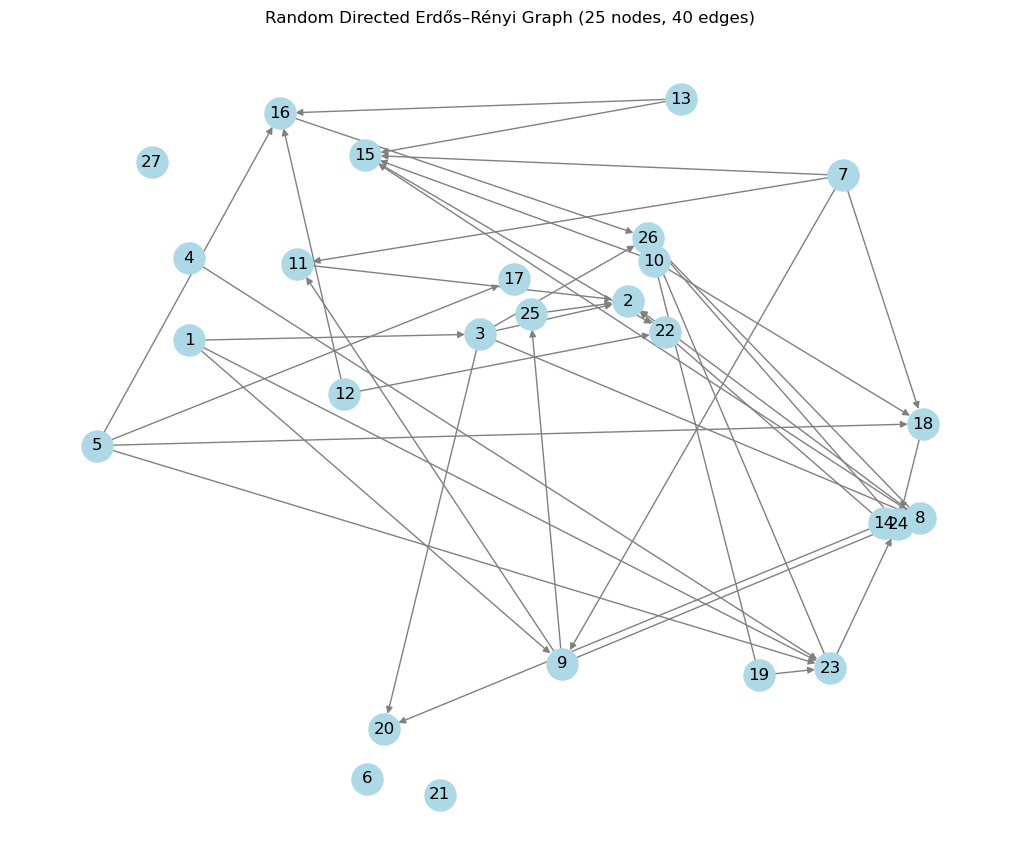

In [2]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import pandas as pd

def create_erdos_renyi_graph(num_nodes, num_edges):
    """
    Create a random directed Erdős–Rényi graph with the following constraints:
    - One super source (node 1) with no inflows
    - One super sink (node 2) with no outflows
    - num_nodes intermediate nodes (nodes 3 to num_nodes+2)
    - num_edges edges, no bidirectional edges, no self-loops, no duplicate edges
    """
    total_nodes = num_nodes + 2  # Including super source and sink
    G = nx.DiGraph()
    node_types = {}
    node_positions = {}

    # Add nodes with types and random positions for plotting
    for node in range(1, total_nodes + 1):
        if node == 1:
            node_types[node] = 'source'
        elif node == 2:
            node_types[node] = 'sink'
        else:
            node_types[node] = 'intermediate'
        node_positions[node] = (random.uniform(0, 10), random.uniform(0, 10))

    # Add all nodes to the graph
    for node in node_types:
        G.add_node(node)

    # Generate all possible valid edges
    possible_edges = []
    for u in range(1, total_nodes + 1):
        for v in range(1, total_nodes + 1):
            if u == v:
                continue  # No self-loops
            if (u == 2) or (v == 1):
                continue  # No inflow to source, no outflow from sink
            if (v, u) in possible_edges:
                continue  # No bidirectional edges
            possible_edges.append((u, v))

    # Randomly sample edges
    if num_edges > len(possible_edges):
        raise ValueError("Too many edges requested for the number of nodes and constraints.")
    selected_edges = random.sample(possible_edges, num_edges)

    # Build edge data for CSV
    edge_data = []
    for u, v in selected_edges:
        G.add_edge(u, v)
        interdictable = 0 if (u == 1 or v == 2) else 1
        bidirectional = 0  # Always 0, as per constraints
        edge_data.append((u, v, interdictable, bidirectional))

    edges_df = pd.DataFrame(edge_data, columns=['Origin', 'Destination', 'Interdictable', 'Bidirectional'])

    # Node data for CSV
    node_data = []
    for node, (x, y) in node_positions.items():
        node_type = node_types[node]
        node_data.append((node, x, y, node_type))
    nodes_df = pd.DataFrame(node_data, columns=['node', 'x_pos', 'y_pos', 'type'])

    return G, node_positions, nodes_df, edges_df

def main():
    num_intermediate_nodes = 25  # Number of intermediate nodes
    num_edges = 40               # Number of edges

    G, node_positions, nodes_df, edges_df = create_erdos_renyi_graph(num_intermediate_nodes, num_edges)

    # Export to CSV files
    nodes_df.to_csv('nodes.csv', index=False)
    edges_df.to_csv('edges.csv', index=False)

    # Plot the graph
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos=node_positions, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray', arrows=True)
    plt.title(f'Random Directed Erdős–Rényi Graph ({num_intermediate_nodes} nodes, {num_edges} edges)')
    plt.show()

if __name__ == "__main__":
    main()